# **HKGB Yield Curve Modeling**

### Portfolio Project by Raynard Arisgraha

In this project, I would like to analyse the different maturities of Hong Kong Government Bonds and apply two different models, Nelson-Siegel (NS) and Cubic Spline, to see how the models differ in terms of fit and interpretation.

In [ ]:
# Import the relevant libraries and functions

!pip install nelson-siegel-svensson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

sns.set()

In [ ]:
# Connect to the dataset stored in the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import and clean the data to be in an indexed dataframe format

column_names = ['Date', '2 Year', '3 Year', '5 Year', '10 Year', '15 Year', '20 Year']
hkgbyields = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HKGB Benchmark Yield.csv")

hkgbyields.columns = column_names

hkgbyields["Datetime"] = pd.to_datetime(hkgbyields["Date"], format="%d.%m.%y")
hkgbyields.set_index("Datetime", inplace=True)
hkgbyields.drop('Date', axis=1, inplace=True)

hkgbyields = hkgbyields.dropna()

hkgbyields.head()

,2 Year,3 Year,5 Year,10 Year,15 Year,20 Year
Datetime,,,,,,
2009-09-03,0.559,-,-,-,-,-
2009-09-04,0.588,-,-,-,-,-
2009-09-07,0.588,-,-,-,-,-
2009-09-08,0.587,-,-,-,-,-
2009-09-09,0.587,-,-,-,-,-


In [ ]:
# Calculate and store the standard deviation and means of the different maturities

hkgbyields = hkgbyields.apply(pd.to_numeric,errors='coerce')
y_std = hkgbyields.std()
y_mean = hkgbyields.mean()

,0
2 Year,0.394161
3 Year,1.367670
5 Year,1.538864
10 Year,2.006853
15 Year,2.239927
20 Year,3.930744


Hong Kong Government Bonds Treasury Yield Curve


<ipython-input-15-96bc5c93faeb>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


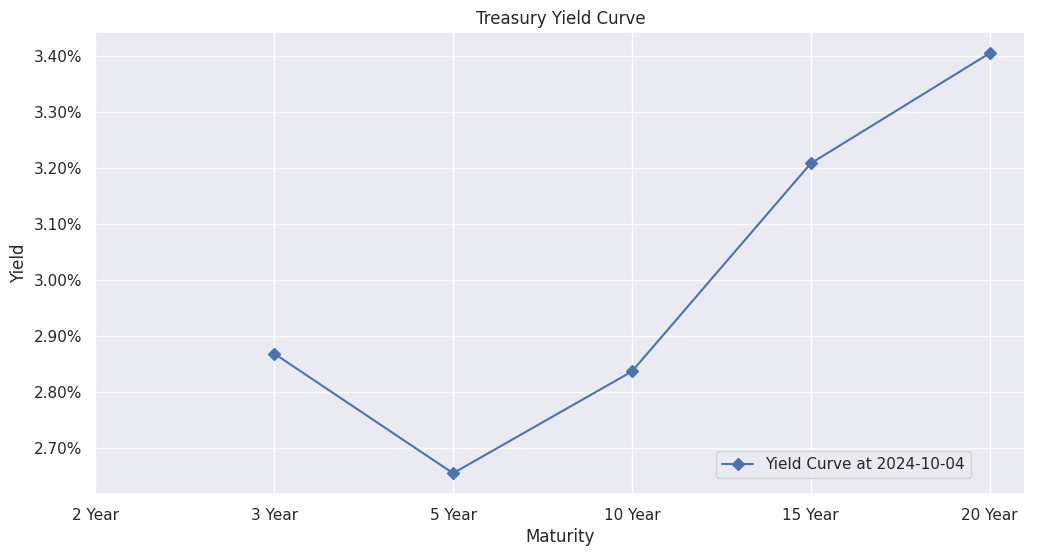

In [ ]:
# Making a plot of the data and showing specifically the yields on

def plot_yield_curve(date):
    maturities = ['2 Year', '3 Year', '5 Year', '10 Year', '15 Year', '20 Year']
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, hkgbyields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title('Treasury Yield Curve')


    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

print("Hong Kong Government Bonds Treasury Yield Curve")
plot_yield_curve('2024-10-04')

### Plotting the Nelson Siegel Model

In [ ]:
# Create maturity and yield variables in array form, dropping 2Y as unavailable on 2024-10-04

t = np.array([3,5,10,15,20])
y = np.array(hkgbyields.loc["2024-10-04"][1:])

In [ ]:
# Fit an Nelson-Siegel (NS) model for yields from 2024-10-04

curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=4.220543620344303, beta1=0.24162511668198272, beta2=-5.67667750841785, tau=2.986525823647642)


Text(0.5, 1.0, 'Question 2c, NS Model Result')

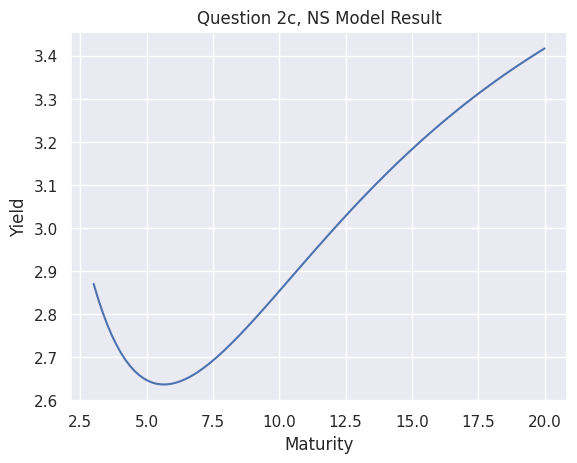

In [ ]:
# Plotting the NS model result

y_hat = curve
t_hat = np.linspace(3,20,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Question 2c, NS Model Result")

### Plotting the Cubic Spline Model

In [ ]:
# Showing the yields on 2024-10-04

hkgbyields.loc["2024-10-04"]

,2024-10-04
2 Year,NaN
3 Year,2.868
5 Year,2.654
10 Year,2.836
15 Year,3.208
20 Year,3.405


In [ ]:
# Put the above yield values in array format

t = np.array([3,5,10,15,20])
y = np.array([2.868,2.654,2.836,3.208,3.405])

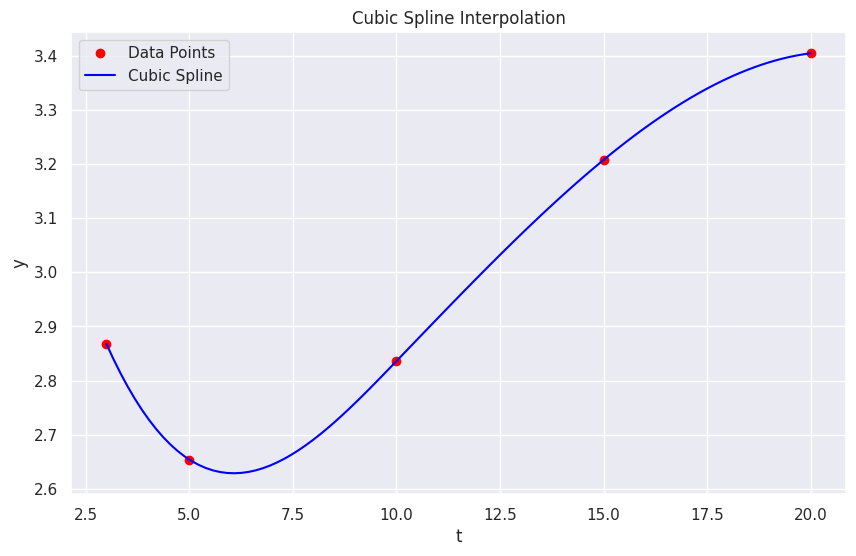

In [ ]:
# Create a cubic spline interpolation object
cs = CubicSpline(t, y)

# Generate new x values for plotting
t_new = np.linspace(3, 20, 100)
y_new = cs(t_new)

# Plot the cubic spline interpolation
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', label='Data Points', color='red')  # Original data points
plt.plot(t_new, y_new, label='Cubic Spline', color='blue')  # Spline curve
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

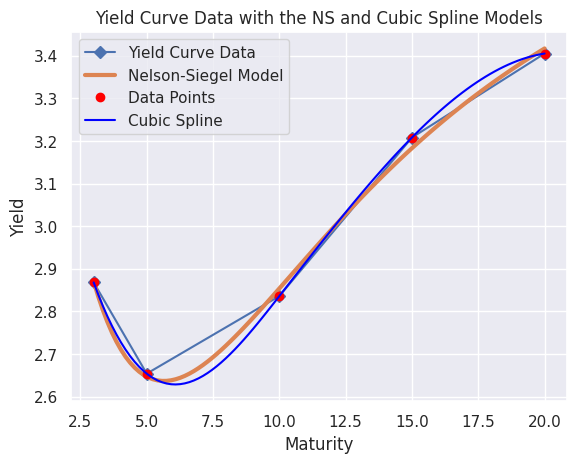

In [ ]:
# Plot the yield curve data
maturities = [3,5,10,15,20]
plt.plot(maturities, y, marker='D', linestyle='-', label='Yield Curve Data')

# Add the NS model plot
y_hat = curve
t_hat = np.linspace(3,20,100)
plt.plot(t_hat, y_hat(t_hat), linewidth=3, label='Nelson-Siegel Model')

# Add the cubic spline plot

plt.plot(t, y, 'o', label='Data Points', color='red')
plt.plot(t_new, y_new, label='Cubic Spline', color='blue')

plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curve Data with the NS and Cubic Spline Models")
plt.legend()
plt.grid(True)
plt.show()

## Analysis

While both the Nelson-Siegel and the Cubic Spline models interpret the Hong Kong Government Bond (HKGB) yields correctly, the NS model fits the data better. With more data, tests such as Ordinary Least Squares or Root Mean Squared Error tests would be appropriate to test the fitness of the different models.

## **References**

Hong Kong Government Bond Statistics https://www.hkgb.gov.hk/en/statistics/statistic.html
